 Upload dataset from local computer

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Housing Price.csv to Housing Price.csv


Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


Load the CSV file into a DataFrame and  Display first 5 rows of the dataset

In [5]:
df = pd.read_csv("/content/Housing Price.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Display dataset structure and info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


 Statistical summary of numerical data

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Check for missing values in each column

In [8]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Visualizing House Price Distribution

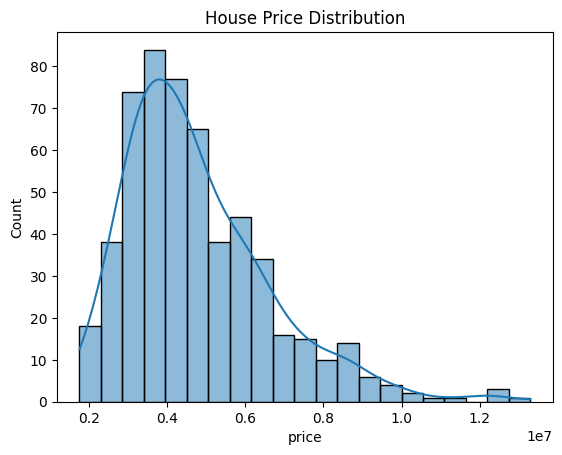

In [10]:
sns.histplot(df['price'], kde=True)
plt.title("House Price Distribution")
plt.show()

Select only numeric columns and Plot correlation heatmap

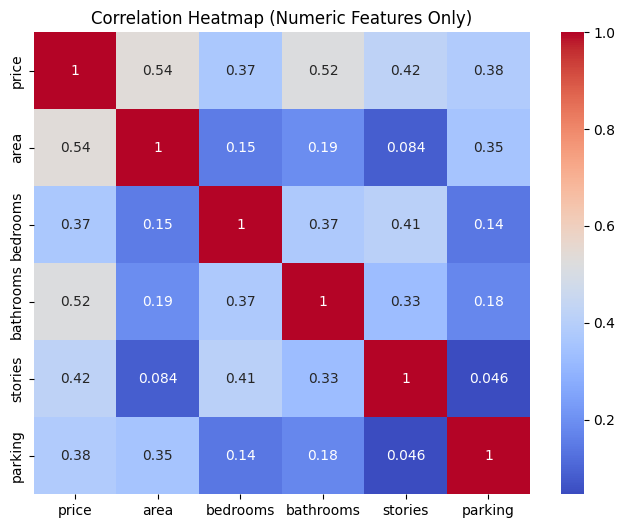

In [12]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


Identify numeric and categorical columns

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include='object').columns

Separate independent variables (X) and dependent variable (y

In [18]:
X = df.drop('price', axis=1)
y = df['price']

Split dataset into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Check if any object (string) columns remain

In [23]:
X_train.select_dtypes(include='object').columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

 One-hot encode categorical variables

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [26]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

Separate features and target again

In [27]:
X = df.drop('price', axis=1)
y = df['price']

Split dataset into training and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Standardize features (important for KNN and Polynomial Regression)


In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Linear Regression model and Predict using test data

In [30]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# ======================================
# Multiple Linear Regression
# (Same model as Linear Regression, but with multiple features)
# ======================================


Apply Polynomial Features to capture non-linear relationships

In [31]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


Train Polynomial Regression model

In [32]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

Predict target values

In [33]:
y_pred_poly = poly_model.predict(X_test_poly)

 Train K-Nearest Neighbors Regression model

In [34]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

Predict target values

In [36]:
y_pred_knn = knn.predict(X_test_scaled)

 Train Decision Tree Regression model
 (Scaling not required for tree-based models)

In [37]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

 Predict target values

In [38]:
y_pred_dt = dt.predict(X_test)

Evaluation Function

In [39]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name}")
    print("Mean Squared Error (MSE):", mse)
    print("R² Score:", r2)
    print("----------------------------------")

Evaluate All Models

In [40]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")
evaluate_model(y_test, y_pred_knn, "KNN Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regression")

Linear Regression
Mean Squared Error (MSE): 1754318687330.6677
R² Score: 0.6529242642153177
----------------------------------
Polynomial Regression
Mean Squared Error (MSE): 1901686413946.4487
R² Score: 0.6237689217365155
----------------------------------
KNN Regression
Mean Squared Error (MSE): 1953996997258.202
R² Score: 0.6134197563748457
----------------------------------
Decision Tree Regression
Mean Squared Error (MSE): 2642802637614.6787
R² Score: 0.4771459275854347
----------------------------------


FINAL COMPARISON

In [41]:
results = pd.DataFrame({
    'Model': ['Linear', 'Polynomial', 'KNN', 'Decision Tree'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_knn),
        mean_squared_error(y_test, y_pred_dt)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_dt)
    ]
})

results


,Model,MSE,R2 Score
0,Linear,1.754319e+12,0.652924
1,Polynomial,1.901686e+12,0.623769
2,KNN,1.953997e+12,0.613420
3,Decision Tree,2.642803e+12,0.477146
